# Step1: Import the libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Read the data

In [402]:
heart_df=pd.read_csv("heart.csv")
heart_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Step3: Exploratory Data analysis

In [403]:
heart_df.shape

(918, 12)

In [244]:
# get the information about the data types
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [245]:
# to know the missing values of data
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Since there are no missing values lets look for the descriptive stats 

In [246]:
heart_df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [247]:
heart_df.describe(include=['object','category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


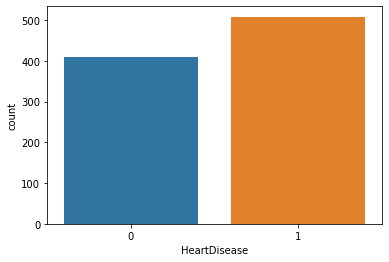

In [248]:
## loot the the HeartDisease count by using count plot

sns.countplot(x="HeartDisease",data=heart_df)

In [249]:
## check the HeartDisese Value counts
heart_df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Since it's not an imbalanced data set, we can further continue to build the model

C:\Users\uvenkata\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


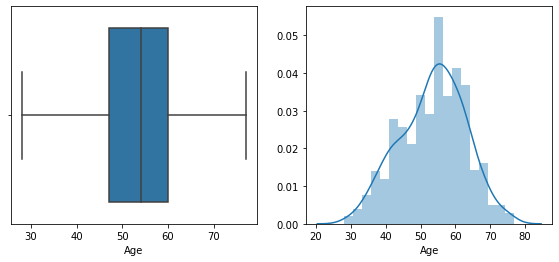

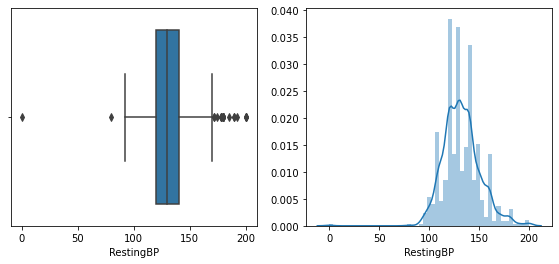

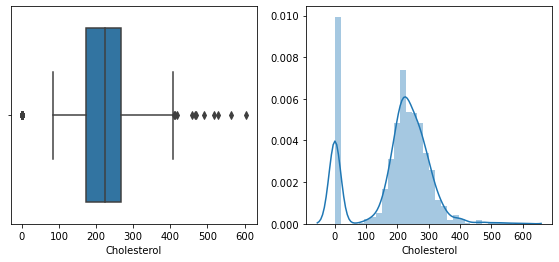

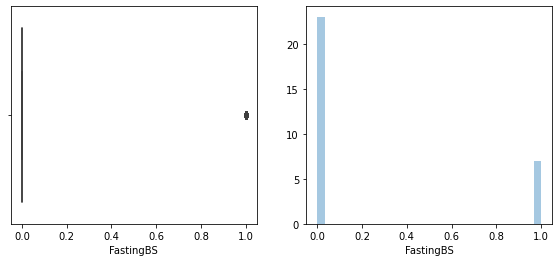

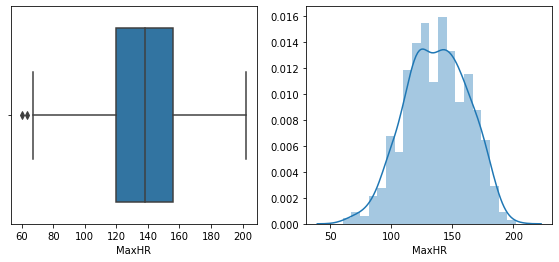

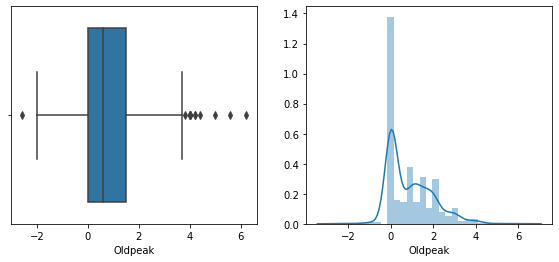

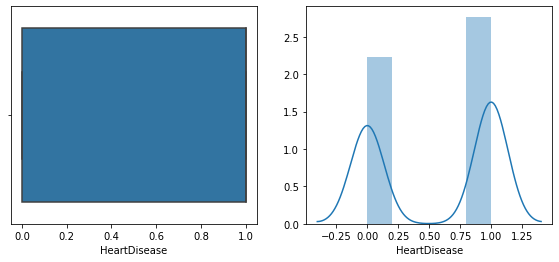

In [419]:
## Outlier analysis of all 

for i in heart_df.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.boxplot(heart_df[i])
    plt.subplot(132)
    sns.distplot(heart_df[i], label="skew: " + str(np.round(heart_df[i].skew(),2)))

In [251]:
heart_df.iloc[:,5]

0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64

In [252]:
heart_df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [253]:
heart_df["HeartDisease"]=heart_df["HeartDisease"].astype('category')

In [254]:
# Target variable column should be renamed for further analysis
heart_df["HeartDisease"]=heart_df["HeartDisease"].map({1:"Yes",0:"No"})

In [255]:
heart_df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes


In [256]:
heart_df["FastingBS"]=heart_df["FastingBS"].astype("category")

In [257]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    category
dtypes: category(2), float64(1), int64(4), object(5)
memory usage: 73.8+ KB


In [258]:
# make two separate entities for numerical and categorical
heart_numerical=heart_df.select_dtypes(include=["int64","float64"])

In [259]:
heart_categorical=heart_df.select_dtypes(include=['object','category'])

In [260]:
heart_numerical.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [261]:
heart_categorical.columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [262]:
for i in heart_categorical.columns:
    print("unique values of the given data {} is {}".format(i,heart_categorical[i].nunique()))
    print(heart_categorical[i].unique())
   

unique values of the given data Sex is 2
['M' 'F']
unique values of the given data ChestPainType is 4
['ATA' 'NAP' 'ASY' 'TA']
unique values of the given data FastingBS is 2
[0, 1]
Categories (2, int64): [0, 1]
unique values of the given data RestingECG is 3
['Normal' 'ST' 'LVH']
unique values of the given data ExerciseAngina is 2
['N' 'Y']
unique values of the given data ST_Slope is 3
['Up' 'Flat' 'Down']
unique values of the given data HeartDisease is 2
[No, Yes]
Categories (2, object): [No, Yes]


# Step4 : Data interpretation between each column and the target feature (heart disease)

In [263]:
#df=len(heart_df[(heart_df['HeartDisease']=='Yes')&(heart_df['Sex']==['M','F'][0])])

In [264]:

#num_value=len(heart_df[(heart_df["Sex"]==['M','F'][0])])

In [265]:
#num_value

In [266]:
#heart_df["Sex"].value_counts()

In [267]:
#print("the probability of heart disease is:",df/num_value)

## probality of getting heartdisease 

In [268]:
def probability_calculations(feature,feature_value):
    
    first_with_heart_disease=len(heart_df[(heart_df['HeartDisease']=='Yes') & (heart_df[feature]==feature_value[0])])  # to get the total count of Yes with respect to features of (0) binary
    num_first_value=len(heart_df[heart_df[feature]==feature_value[0]]) # get the count of total features with respect 0th value
    
    second_with_heart_disease=len(heart_df[(heart_df['HeartDisease']=='Yes') & (heart_df[feature]==feature_value[1])])
    num_second_value=len(heart_df[heart_df[feature]==feature_value[1]])
    
    print("\n" + feature +":\n")
    print("probability of {} :{} to have heart disease:".format(feature,feature_value[0]),first_with_heart_disease/num_first_value)
    print("probability of {} :{} to have heart disease:".format(feature,feature_value[1]),second_with_heart_disease/num_second_value)

### probability to have heart disease for male and female

In [269]:

probability_calculations("Sex",['M', 'F'])


Sex:

probability of Sex :M to have heart disease: 0.6317241379310344
probability of Sex :F to have heart disease: 0.25906735751295334


# Interpretation
#### ~65% of the males having heart disease than females
#### males are 3 times more likely to have heart disease

In [270]:
probability_calculations('ExerciseAngina',['Y','N'])


ExerciseAngina:

probability of ExerciseAngina :Y to have heart disease: 0.8517520215633423
probability of ExerciseAngina :N to have heart disease: 0.3510054844606947


# Interpretation
#### with Angina probability of having heart disease is high

In [271]:
probability_calculations('FastingBS',[1,0])


FastingBS:

probability of FastingBS :1 to have heart disease: 0.794392523364486
probability of FastingBS :0 to have heart disease: 0.48011363636363635


# Interpretation
#### Fasting blood sugar > 120mg, the probability of having heart disease is almost 0.8 ( High )

In [272]:
# count plot of each feature with respect to heart disease

def count_plot_categorical(data,feature,target):
    plt.figure(figsize=(10,6))
    grouped_columns=sns.countplot(x=feature,hue=target,data=data)
    grouped_columns.set_title("count plot for {} {}:".format(target,feature))
  
    

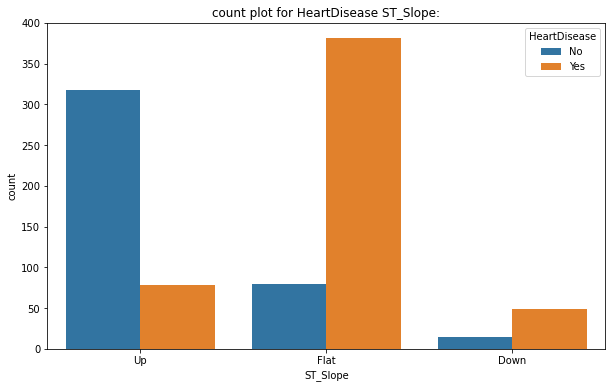

In [273]:
count_plot_categorical(heart_df,"ST_Slope","HeartDisease")

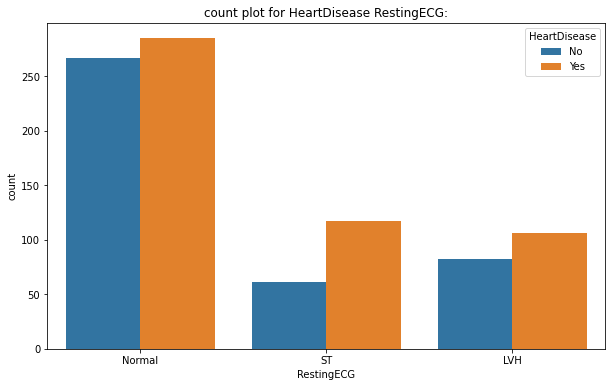

In [274]:
count_plot_categorical(heart_df,"RestingECG","HeartDisease")

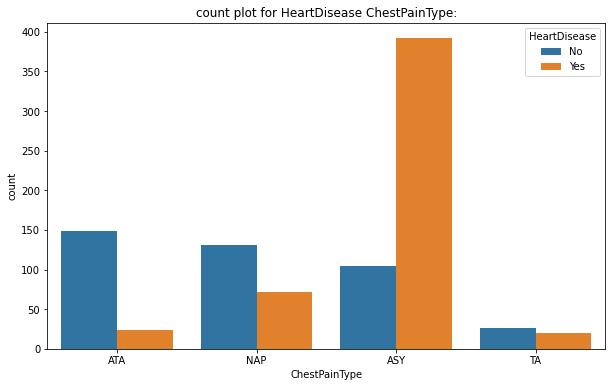

In [275]:
count_plot_categorical(heart_df,"ChestPainType","HeartDisease")

# Probability distribution visualisation for contineous data of numerical features using Kernel Desnsity Estimate plots

Text(0, 0.5, 'HeartDisease')

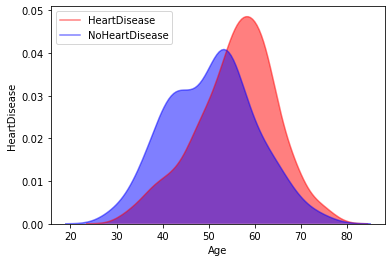

In [276]:
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["Age"], alpha=0.5,shade = True, color="red", label="HeartDisease")
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='No']["Age"],alpha=0.5,shade= True,color="blue",label="NoHeartDisease")
plt.xlabel("Age")
plt.ylabel("HeartDisease")

In [277]:
heart_numerical.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [278]:
def kde_numerical_features(target,feature):
    plt.figure(figsize=(10,4))
    sns.kdeplot(heart_df[heart_df[target]=='Yes'][feature], alpha=0.5,shade = True, color="red", label="HeartDisease")
    sns.kdeplot(heart_df[heart_df[target]=='No'][feature],alpha=0.5,shade= True,color="green",label="NoHeartDisease")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    

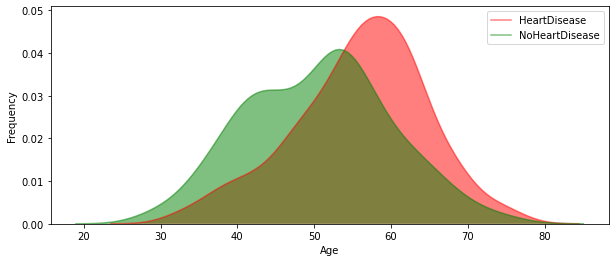

In [279]:
kde_numerical_features("HeartDisease","Age")

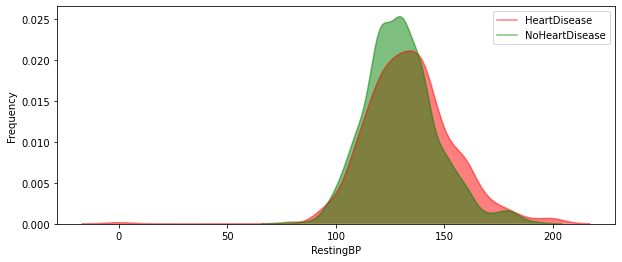

In [280]:
kde_numerical_features("HeartDisease","RestingBP")

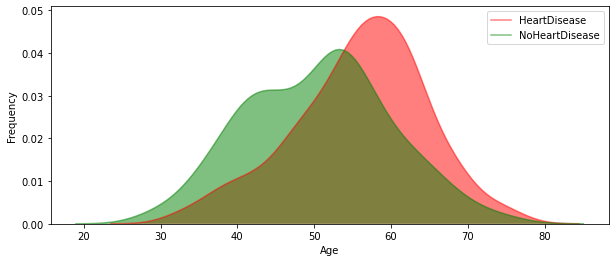

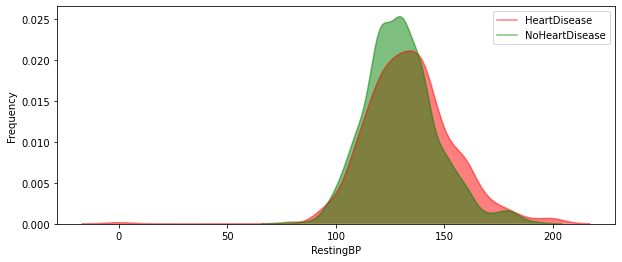

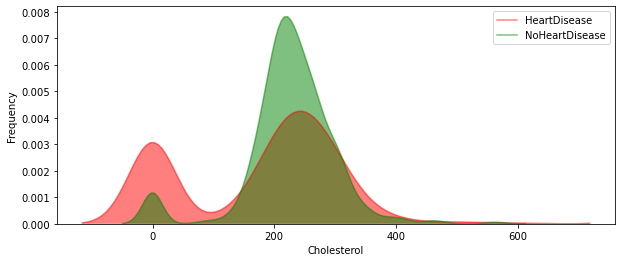

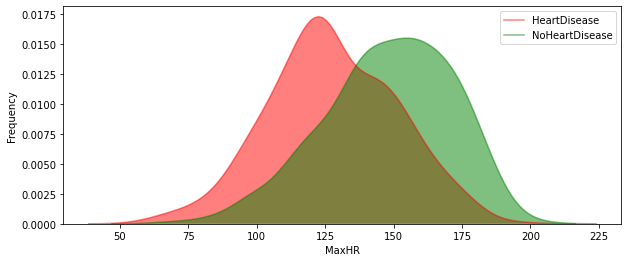

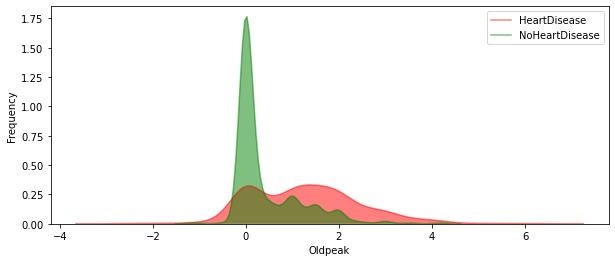

In [281]:
for feature in heart_numerical:
    kde_numerical_features("HeartDisease",feature)

In [282]:
heart_numerical.skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [283]:
heart_categorical

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,No
1,F,NAP,0,Normal,N,Flat,Yes
2,M,ATA,0,ST,N,Up,No
3,F,ASY,0,Normal,Y,Flat,Yes
4,M,NAP,0,Normal,N,Up,No
...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,Flat,Yes
914,M,ASY,1,Normal,N,Flat,Yes
915,M,ASY,0,Normal,Y,Flat,Yes
916,F,ATA,0,LVH,N,Flat,Yes


In [347]:
heart_numerical

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [348]:
heart_categorical["HeartDisease"]=heart_categorical["HeartDisease"].map({"Yes":1,"No":0})

<ipython-input-348-39a41aca1af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_categorical["HeartDisease"]=heart_categorical["HeartDisease"].map({"Yes":1,"No":0})


In [349]:
heart_categorical

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0
...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,Flat,1
914,M,ASY,1,Normal,N,Flat,1
915,M,ASY,0,Normal,Y,Flat,1
916,F,ATA,0,LVH,N,Flat,1


In [350]:
# One hot Endcoding categorical feature:
heart_encode=pd.get_dummies(heart_categorical,drop_first=True)

In [351]:
final_df=pd.concat([heart_numerical,heart_encode],axis=1)

In [352]:
final_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,40,140,289,172,0.0,1,1,0,0,0,1,0,0,0,1,0
1,49,160,180,156,1.0,0,0,1,0,0,1,0,0,1,0,1
2,37,130,283,98,0.0,1,1,0,0,0,0,1,0,0,1,0
3,48,138,214,108,1.5,0,0,0,0,0,1,0,1,1,0,1
4,54,150,195,122,0.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,0,1,0,1,0,0,1,0,1
914,68,144,193,141,3.4,1,0,0,0,1,1,0,0,1,0,1
915,57,130,131,115,1.2,1,0,0,0,0,1,0,1,1,0,1
916,57,130,236,174,0.0,0,1,0,0,0,0,0,0,1,0,1


In [353]:
x=final_df.drop("HeartDisease_1",axis=1)

In [329]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(x)

In [354]:
y=heart_categorical["HeartDisease"]

In [355]:
x

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,0,0,1,1,0,0,1,0
915,57,130,131,115,1.2,1,0,0,0,0,1,0,1,1,0
916,57,130,236,174,0.0,0,1,0,0,0,0,0,0,1,0


# Modeling

## Spliting the data into training and testing

In [369]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [423]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# Logistic Regression model

In [371]:
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [372]:
y_train_predict=logit.predict(x_train)
y_test_predict=logit.predict(x_test)

In [373]:
#training accuracy
accuracy_score(y_train,y_train_predict)

0.8691860465116279

In [374]:
#testing accuracy
def metrics(actual,predicted):
    print("accuracy of the model is:{}",format(accuracy_score(actual,predicted)))
    print("precision of the model is:{}",format(precision_score(actual,predicted)))
    print("recall of the model is:{}",format(recall_score(actual,predicted)))
    print("f1score of the model is:{}",format(f1_score(actual,predicted)))

In [339]:
metrics(y_test,y_test_predict)

accuracy of the model is:{} 0.8478260869565217
precision of the model is:{} 0.8590604026845637
recall of the model is:{} 0.8590604026845637
f1score of the model is:{} 0.8590604026845637


In [422]:
confusion_matrix(y_test,y_test_predict)


array([[261,  51],
       [ 39, 337]], dtype=int64)

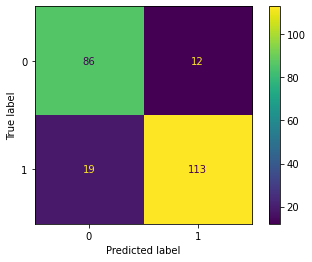

In [431]:
plot_confusion_matrix(logit,x_test,y_test)

# Decision Tree Model

In [375]:
from sklearn.tree import DecisionTreeClassifier
Dtc=DecisionTreeClassifier()

In [376]:
Dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [377]:
y_train_predict_dt=logit.predict(x_train)
y_test_predict_dt=logit.predict(x_test)

In [389]:
metrics(y_test,y_test_predict_dt)

accuracy of the model is:{} 0.8652173913043478
precision of the model is:{} 0.904
recall of the model is:{} 0.8560606060606061
f1score of the model is:{} 0.8793774319066149


In [378]:
print(accuracy_score(y_test,y_test_predict_dt))

0.8652173913043478


In [379]:
print(precision_score(y_test,y_test_predict_dt))

0.904


In [380]:
print(recall_score(y_test,y_test_predict_dt))

0.8560606060606061


In [381]:
print(f1_score(y_test,y_test_predict_dt))

0.8793774319066149


# RandonForest Classifier

In [386]:
from sklearn.ensemble import RandomForestClassifier
rand_classifier=RandomForestClassifier()
rand_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [387]:
y_train_predict_rand=rand_classifier.predict(x_train)
y_test_predict_rand=rand_classifier.predict(x_test)

In [388]:
metrics(y_test,y_test_predict_rand)

accuracy of the model is:{} 0.8565217391304348
precision of the model is:{} 0.8837209302325582
recall of the model is:{} 0.8636363636363636
f1score of the model is:{} 0.8735632183908046


# Support Vector Machines

In [393]:
from sklearn.svm import LinearSVC

Svm=LinearSVC(max_iter=2000)
Svm.fit(x_train,y_train)

LinearSVC(max_iter=2000)

In [404]:
y_train_predict_svm=Svm.predict(x_train)
y_test_predict_svm=Svm.predict(x_test)

In [405]:
print(y_test_predict_svm)

[0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0]


In [412]:
metrics(y_test,y_test_predict_svm)

accuracy of the model is:{} 0.8652173913043478
precision of the model is:{} 0.904
recall of the model is:{} 0.8560606060606061
f1score of the model is:{} 0.8793774319066149


# Inference
### When compare to all the models, Random forest has the highest Recall hence we would be considering RandomForest is our model

# Model Optimisation
#### Ramdon Forest Hyper parameter tuning

In [414]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [415]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_fit = grid_search.fit(x_train, y_train)
best_parameters = grid_fit.best_params_

In [416]:
best_parameters

{'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [417]:
best_classifier = RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_leaf=4, min_samples_split=12,max_features=2)
best_classifier.fit(x_train, y_train)
predictions = best_classifier.predict(x_test)

In [418]:
metrics(y_test,predictions)

accuracy of the model is:{} 0.8739130434782608
precision of the model is:{} 0.8814814814814815
recall of the model is:{} 0.9015151515151515
f1score of the model is:{} 0.8913857677902621


# Overall Inference of the Model is:
#### The recall is the measure of our model correctly identifying True Positives ✅ . Thus, for all the patients who actually have heart disease, recall tells us how many we correctly identified as having a heart disease.